prediction: tensor([[0.6299],
        [0.7219],
        [0.7733],
        [0.7770],
        [0.8082],
        [0.7080],
        [0.6734],
        [0.6866],
        [0.7121],
        [0.7046],
        [0.6741],
        [0.6027],
        [0.5884],
        [0.6011],
        [0.6065],
        [0.6552],
        [0.7677],
        [0.6697],
        [0.6876],
        [0.5501],
        [0.6740],
        [0.6098],
        [0.6509],
        [0.7288],
        [0.6621],
        [0.6634],
        [0.6437],
        [0.6421]], grad_fn=<AddmmBackward>) batch_y:  tensor([[0.9342],
        [0.9430],
        [0.9561],
        [0.9771],
        [0.9792],
        [0.9648],
        [0.9978],
        [0.9802],
        [0.9516],
        [0.9128],
        [0.8975],
        [0.6601],
        [0.7594],
        [0.7562],
        [0.7838],
        [0.9834],
        [0.8401],
        [0.9220],
        [0.9973],
        [0.8635],
        [0.9490],
        [0.9413],
        [0.8908],
        [0.9889],
        [0.9979]

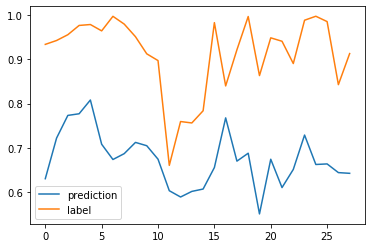

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.utils.data as Data
from torch.autograd import Variable

inputdata=np.load('inputdata.npy')
label=np.load('label.npy')
inputdata = np.load('inputdata.npy')
label = np.load('label.npy')
label=np.reshape(label,(28,1)) 

BATCH_SIZE = 28
inputdata = torch.from_numpy(inputdata).float()
label = torch.from_numpy(label).float()
torch_dataset = Data.TensorDataset(inputdata, label)
trainloader = Data.DataLoader(
        dataset=torch_dataset, 
        batch_size=BATCH_SIZE, 
        shuffle=False, num_workers=0,)

class Actor(nn.Module):
    
    def __init__(self):
        super(Actor, self).__init__()
        self.layer_1 = nn.Conv2d(1, 16, kernel_size=(7, 7), stride=1,padding=3)
        self.mp = nn.MaxPool2d(2) 
        self.layer_2 = nn.Conv2d(16, 16, kernel_size=(7, 7), stride=1,padding=3)
        self.layer_3 = nn.Conv2d(16, 16, kernel_size=(7, 7), stride=1,padding=3)
        self.layer_4 = nn.Linear(2592, 1) #全连接层

    def forward(self, x):
        x = x.view(x.size(0),1, 20, 655) #batch_size,channel,w,h
        #print(x.size())
        x = F.relu(self.mp(self.layer_1(x)))
        x = F.relu(self.mp(self.layer_2(x)))
        x = F.relu(self.mp(self.layer_3(x)))
        x = x.view(x.size(0), 2592)
        x = self.layer_4(x)
        return x

model= Actor()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
criterion = torch.nn.MSELoss()  
mean=[]
for epoch in range(4000):
    loss_list = []  
    for step, (batch_x, batch_y) in enumerate(trainloader, 0): 
        prediction=model(batch_x)
        loss = criterion(prediction, batch_y)
        loss_list.append(loss.data.numpy())  
        loss.backward()         
        optimizer.step() 
        #print(batch_y)
        if epoch == 3999:
            print('prediction:',prediction,'batch_y: ',batch_y)
    mean.append(np.mean(loss_list))
    #print('epoch: ', epoch, 'mean loss: ', np.mean(loss_list))

plt.plot(prediction.data.numpy(), label='prediction')
plt.plot(batch_y.data.numpy(), label='label')
print(plt.legend())

